In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set_style('darkgrid')

In [3]:
df=pd.read_csv('Mall_Customers.csv')

In [4]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
df=df.rename(columns={'Genre':'Gender'})

In [6]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [7]:
df=df.drop('CustomerID',axis=1)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 5.5+ KB


In [9]:
df.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


<AxesSubplot:xlabel='Gender', ylabel='count'>

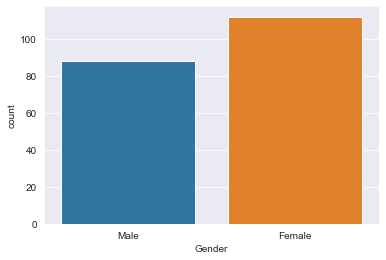

In [10]:
sns.countplot(x='Gender',data=df)

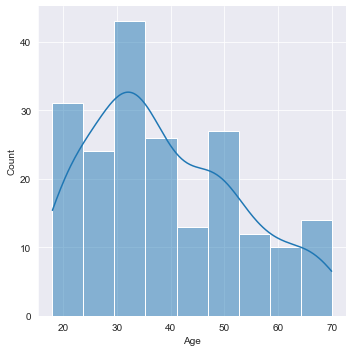

In [61]:
sns.displot(x='Age',data=df, kde=True)

<AxesSubplot:xlabel='Age', ylabel='Count'>

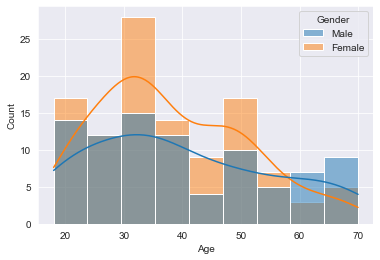

In [15]:
sns.histplot(x='Age',data=df, kde=True, hue='Gender')

In [16]:
df.columns

Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

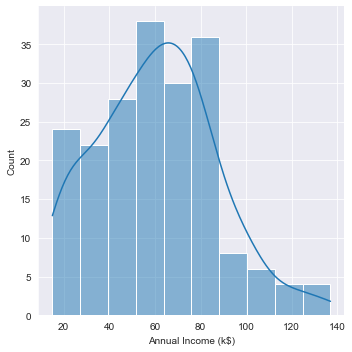

In [60]:
sns.displot(x='Annual Income (k$)',data=df,kde=True)

C:\Users\owner\anaconda\New folder\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Spending Score (1-100)', ylabel='Density'>

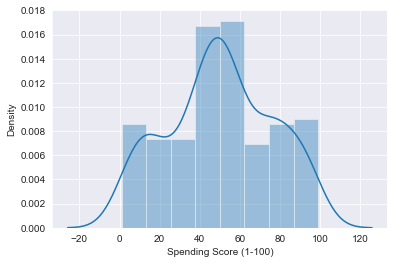

In [59]:
sns.distplot(df['Spending Score (1-100)'])

<AxesSubplot:xlabel='Age', ylabel='Annual Income (k$)'>

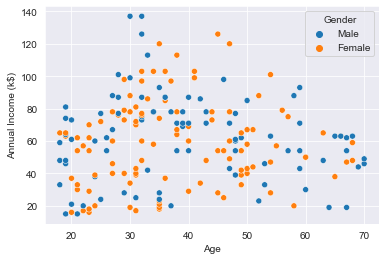

In [23]:
sns.scatterplot(x='Age', y='Annual Income (k$)',data=df, hue='Gender')

<AxesSubplot:xlabel='Age', ylabel='Spending Score (1-100)'>

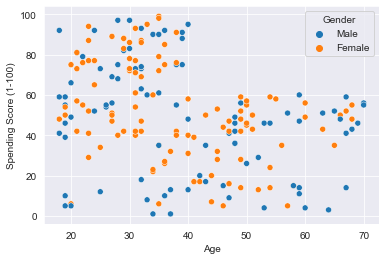

In [24]:
sns.scatterplot(x='Age', y='Spending Score (1-100)',data=df, hue='Gender')

In [26]:
X=pd.get_dummies(df)

In [27]:
X.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male
0,19,15,39,0,1
1,21,15,81,0,1
2,20,16,6,1,0
3,23,16,77,1,0
4,31,17,40,1,0


In [28]:
from sklearn.preprocessing import StandardScaler

In [29]:
scaler=StandardScaler()

In [30]:
scaled_X=scaler.fit_transform(X)

In [31]:
scaled_X

array([[-1.42456879, -1.73899919, -0.43480148, -1.12815215,  1.12815215],
       [-1.28103541, -1.73899919,  1.19570407, -1.12815215,  1.12815215],
       [-1.3528021 , -1.70082976, -1.71591298,  0.88640526, -0.88640526],
       [-1.13750203, -1.70082976,  1.04041783,  0.88640526, -0.88640526],
       [-0.56336851, -1.66266033, -0.39597992,  0.88640526, -0.88640526],
       [-1.20926872, -1.66266033,  1.00159627,  0.88640526, -0.88640526],
       [-0.27630176, -1.62449091, -1.71591298,  0.88640526, -0.88640526],
       [-1.13750203, -1.62449091,  1.70038436,  0.88640526, -0.88640526],
       [ 1.80493225, -1.58632148, -1.83237767, -1.12815215,  1.12815215],
       [-0.6351352 , -1.58632148,  0.84631002,  0.88640526, -0.88640526],
       [ 2.02023231, -1.58632148, -1.4053405 , -1.12815215,  1.12815215],
       [-0.27630176, -1.58632148,  1.89449216,  0.88640526, -0.88640526],
       [ 1.37433211, -1.54815205, -1.36651894,  0.88640526, -0.88640526],
       [-1.06573534, -1.54815205,  1.0

In [32]:
from sklearn.cluster import KMeans

In [115]:
ssd=[]

for k in range(1,12):
    model=KMeans(n_clusters=k)
    model.fit(scaled_X)
    
    ssd.append(model.inertia_)

In [116]:
ssd

[1000.0000000000002,
 597.947293793228,
 488.1952688524798,
 386.7147857740688,
 331.3786392229278,
 281.0938816318835,
 240.0033657433026,
 199.7166255966767,
 174.2504760124712,
 152.6470392967239,
 137.13089037728145]

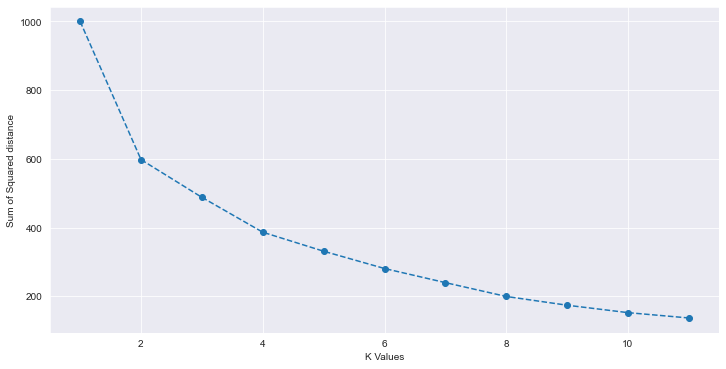

In [117]:
plt.figure(figsize=(12,6))
plt.plot(range(1,12),ssd, 'o--')
plt.xlabel('K Values')
plt.ylabel('Sum of Squared distance');

In [37]:
pd.Series(ssd)

0     1000.000000
1      597.947294
2      488.195269
3      386.714786
4      331.264999
5      280.717732
6      239.107217
7      199.716626
8      177.061824
9      152.705744
10     137.744702
dtype: float64

In [67]:
pd.Series(ssd).diff()

0            NaN
1    -402.052706
2    -109.752025
3    -101.480483
4     -55.449786
5     -50.547267
6     -41.610515
7     -39.390592
8     -22.654802
9     -24.356080
10    -14.961042
dtype: float64

In [78]:
#Choosing k=5

model=KMeans(n_clusters=5, random_state=101, max_iter=100)

In [79]:
model.fit(scaled_X)

C:\Users\owner\anaconda\New folder\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(max_iter=100, n_clusters=5, random_state=101)

In [80]:
model.labels_

array([0, 0, 2, 1, 1, 1, 2, 1, 3, 1, 3, 1, 2, 1, 3, 0, 2, 0, 3, 1, 3, 0,
       2, 0, 2, 0, 2, 0, 2, 1, 3, 1, 3, 0, 2, 1, 2, 1, 2, 1, 2, 0, 3, 1,
       2, 1, 2, 1, 1, 1, 2, 0, 1, 3, 2, 3, 2, 3, 1, 3, 3, 0, 2, 2, 3, 0,
       2, 2, 0, 1, 3, 2, 2, 2, 3, 0, 2, 0, 1, 2, 3, 0, 3, 2, 1, 3, 2, 1,
       1, 2, 2, 0, 3, 2, 1, 0, 2, 1, 3, 0, 1, 2, 3, 0, 3, 1, 2, 3, 3, 3,
       3, 1, 2, 0, 1, 1, 2, 2, 2, 2, 0, 2, 1, 0, 1, 1, 4, 0, 3, 0, 4, 0,
       1, 1, 4, 1, 2, 0, 4, 1, 2, 0, 1, 1, 4, 0, 4, 1, 2, 0, 4, 0, 2, 1,
       2, 1, 4, 1, 4, 1, 2, 1, 4, 1, 4, 1, 4, 1, 2, 0, 4, 0, 4, 0, 2, 1,
       4, 0, 4, 0, 2, 1, 4, 1, 2, 0, 2, 0, 2, 1, 2, 1, 4, 1, 2, 1, 2, 0,
       4, 0])

In [81]:
X['Label']=model.labels_

In [82]:
X.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male,Label
0,19,15,39,0,1,0
1,21,15,81,0,1,0
2,20,16,6,1,0,2
3,23,16,77,1,0,1
4,31,17,40,1,0,1


In [87]:
df['Label']=model.labels_

<AxesSubplot:xlabel='Age', ylabel='Annual Income (k$)'>

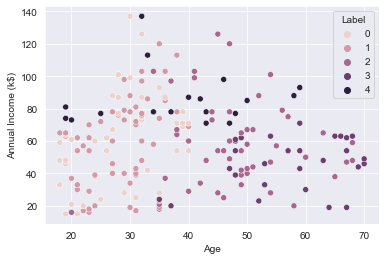

In [83]:
sns.scatterplot(x='Age', y='Annual Income (k$)',data=X, hue='Label')

<AxesSubplot:>

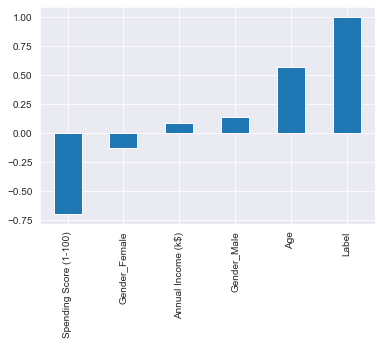

In [84]:
X.corr()['Label'].sort_values().plot(kind='bar')

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

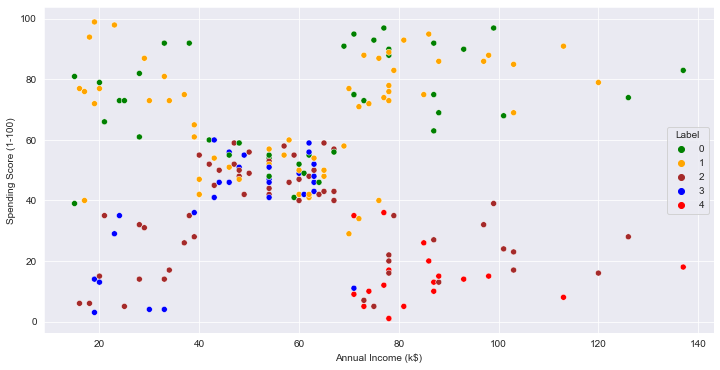

In [88]:
plt.figure(figsize=(12,6))
sns.scatterplot(data=df, x="Annual Income (k$)", y="Spending Score (1-100)", hue="Label", palette=['green','orange','brown','blue','red'])

In [90]:
x=X.drop(['Gender_Female','Gender_Male','Label'],axis=1)

In [91]:
x

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
...,...,...,...
195,35,120,79
196,45,126,28
197,32,126,74
198,32,137,18


In [92]:
x_scaled=scaler.fit_transform(x)

In [93]:
x_scaled

array([[-1.42456879, -1.73899919, -0.43480148],
       [-1.28103541, -1.73899919,  1.19570407],
       [-1.3528021 , -1.70082976, -1.71591298],
       [-1.13750203, -1.70082976,  1.04041783],
       [-0.56336851, -1.66266033, -0.39597992],
       [-1.20926872, -1.66266033,  1.00159627],
       [-0.27630176, -1.62449091, -1.71591298],
       [-1.13750203, -1.62449091,  1.70038436],
       [ 1.80493225, -1.58632148, -1.83237767],
       [-0.6351352 , -1.58632148,  0.84631002],
       [ 2.02023231, -1.58632148, -1.4053405 ],
       [-0.27630176, -1.58632148,  1.89449216],
       [ 1.37433211, -1.54815205, -1.36651894],
       [-1.06573534, -1.54815205,  1.04041783],
       [-0.13276838, -1.54815205, -1.44416206],
       [-1.20926872, -1.54815205,  1.11806095],
       [-0.27630176, -1.50998262, -0.59008772],
       [-1.3528021 , -1.50998262,  0.61338066],
       [ 0.94373197, -1.43364376, -0.82301709],
       [-0.27630176, -1.43364376,  1.8556706 ],
       [-0.27630176, -1.39547433, -0.590

In [94]:
import warnings
warnings.filterwarnings('ignore')

In [95]:
kmeans_model=KMeans(n_clusters=5)

In [96]:
kmeans_model.fit(x_scaled)

KMeans(n_clusters=5)

In [97]:
kmeans_model.labels_

array([3, 3, 1, 3, 3, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 2, 3, 1, 3,
       1, 3, 2, 3, 3, 3, 2, 3, 3, 2, 2, 2, 2, 2, 3, 2, 2, 3, 2, 2, 2, 3,
       2, 2, 3, 3, 2, 2, 2, 2, 2, 3, 2, 2, 3, 2, 2, 3, 2, 2, 3, 2, 2, 3,
       3, 2, 2, 3, 2, 2, 3, 3, 2, 3, 2, 3, 3, 2, 2, 3, 2, 3, 2, 2, 2, 2,
       2, 3, 4, 3, 3, 3, 2, 2, 2, 2, 3, 4, 0, 0, 4, 0, 4, 0, 4, 0, 4, 0,
       4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0,
       4, 0, 4, 0, 4, 0, 2, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0,
       4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0,
       4, 0])

In [99]:
x['Label']=kmeans_model.labels_

In [100]:
x.head()

,Age,Annual Income (k$),Spending Score (1-100),Label
0,19,15,39,3
1,21,15,81,3
2,20,16,6,1
3,23,16,77,3
4,31,17,40,3


<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

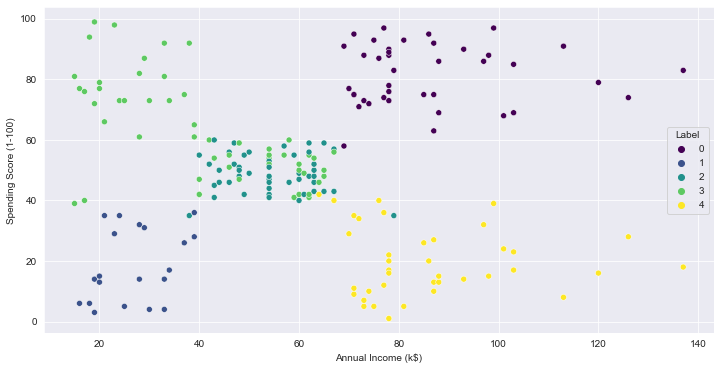

In [103]:
plt.figure(figsize=(12,6))
sns.scatterplot(data=x, x="Annual Income (k$)", y="Spending Score (1-100)", hue="Label", palette='viridis')

<AxesSubplot:xlabel='Label', ylabel='Annual Income (k$)'>

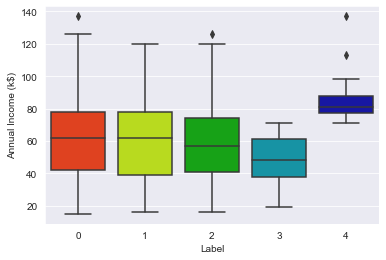

In [104]:
sns.boxplot(x='Label', y='Annual Income (k$)', data=df, palette="nipy_spectral_r")

In [106]:
df=df.drop('Label',axis=1)

In [107]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [108]:
df['Label']=kmeans_model.labels_

In [109]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Label
0,Male,19,15,39,3
1,Male,21,15,81,3
2,Female,20,16,6,1
3,Female,23,16,77,3
4,Female,31,17,40,3


In [110]:
df1=pd.read_csv('Mall_Customers.csv')

In [112]:
df['CustomerID']=df1['CustomerID']

In [113]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Label,CustomerID
0,Male,19,15,39,3,1
1,Male,21,15,81,3,2
2,Female,20,16,6,1,3
3,Female,23,16,77,3,4
4,Female,31,17,40,3,5


In [114]:
cust1=df[df.Label==0]
print("The number of customers in 1st group = ", len(cust1))
print("The Customer Id are - ", cust1.CustomerID.values)
print("==========================================================================================\n")
cust2=df[df.Label==1]
print("The number of customers in 2st group = ", len(cust2))
print("The Customer Id are - ", cust2.CustomerID.values)
print("==========================================================================================\n")
cust3= df[df.Label==2]
print("The number of customer in 3rd group = ",len(cust3))
print("The Customer Id are-",cust3.CustomerID.values)
print("=========================================================================================\n")
cust4 = df[df.Label==3]
print("The number of customer in 4th group = ",len(cust4))
print("The customer Id are- ",cust4.CustomerID.values)
print("=================================================================================================\n")
cust5 = df[df.Label==4]
print("The number of customer in 5th group = ",len(cust5))
print("The customer Id are-",cust5.CustomerID.values)
print("===========================================================================================================================\n")

The number of customers in 1st group =  40
The Customer Id are -  [123 124 126 128 130 132 134 136 138 140 142 144 146 148 150 152 154 156
 158 160 162 164 166 168 170 172 174 176 178 180 182 184 186 188 190 192
 194 196 198 200]

The number of customers in 2st group =  20
The Customer Id are -  [ 3  7  9 11 13 15 17 19 21 23 25 27 29 31 33 35 37 39 43 45]

The number of customer in 3rd group =  47
The Customer Id are- [ 41  47  51  54  55  56  57  58  60  61  63  64  65  67  68  71  72  73
  74  75  77  78  80  81  83  84  86  87  90  91  93  94  97  99 102 103
 105 107 108 109 110 111 117 118 119 120 161]

The number of customer in 4th group =  54
The customer Id are-  [  1   2   4   5   6   8  10  12  14  16  18  20  22  24  26  28  30  32
  34  36  38  40  42  44  46  48  49  50  52  53  59  62  66  69  70  76
  79  82  85  88  89  92  95  96  98 100 101 104 106 112 114 115 116 121]

The number of customer in 5th group =  39
The customer Id are- [113 122 125 127 129 131 133 135 137